###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Siječanj 2023.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `ETFprices.csv`. 

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja, te odgovore na zadana pitanja.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 20.1.2023. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeIme.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 8 ETF-ova (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Ticker | Fond | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
VTI | Vanguard Total Stock Market ETF | Equity: U.S. - Total Market
QQQ | Invesco QQQ Trust | Equity: U.S. - Large Cap
VEA | Vanguard FTSE Developed Markets ETF | Equity: Developed Markets Ex-U.S. - Total Market
AGG | iShares Core U.S. Aggregate Bond ETF | Fixed Income: U.S. - Broad Market, Broad-based Investment Grade
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market, Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate, Broad-based Investment Grade
VCIT | Vanguard Intermediate-Term Corporate Bond ETF | Fixed Income: U.S. - Corporate, Broad-based Investment Grade Intermediate

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [ ]:
import pandas as pd

prices = pd.read_csv('ETFprices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


,SPY,VTI,QQQ,VEA,AGG,BND,LQD,VCIT
Time,,,,,,,,
2022-01-10,458.078430,231.924240,377.329224,49.100105,109.858536,81.452065,125.620148,88.636536
2022-01-11,462.250763,234.236588,382.997437,49.682655,110.063812,81.617920,125.998177,88.753113
2022-01-12,463.500458,234.600677,384.516266,50.216679,110.063812,81.588654,125.910950,88.811386
2022-01-13,457.114075,231.166565,374.897156,49.857430,110.259331,81.725235,126.308357,88.976517
2022-01-14,457.301086,231.255142,377.229950,49.740917,109.643509,81.276474,125.193680,88.481125


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu). 

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$. Izračunajte anualizirane srednje povrate i volatilnosti te rezultate ispišite u konzolu. 


In [ ]:
#Vaš kod ide ovdje

# izračunamo dnevne povrate
returns = prices.pct_change()

# izračunamo srednje povrate
mean_returns = returns.mean()

# izračunamo volatilnost (standardnu devijaciju povrata)
volatility = returns.std()

# anualizirani srednji povrati i volatilnost
annual_mean_returns = mean_returns * 252
annual_volatility = volatility * 252 ** 0.5

# ispišemo rezultate
print("Anualizirani srednji povrati:\n")
print(annual_mean_returns)
print()
print("Anualizirana volatilnost:\n")
print(annual_volatility)

Anualizirani srednji povrati:

SPY    -0.138092
VTI    -0.148174
QQQ    -0.283459
VEA    -0.092129
AGG    -0.098139
BND    -0.099603
LQD    -0.135087
VCIT   -0.104975
dtype: float64

Anualizirana volatilnost:

SPY     0.243655
VTI     0.249912
QQQ     0.322061
VEA     0.224686
AGG     0.081305
BND     0.080695
LQD     0.123953
VCIT    0.095454
dtype: float64


1.2 Koristeći dnevne povrate, potrebno je izračunati matricu kovarijance $\Sigma$ i matricu korelacije $C$ svih ETF-ova. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke. Matrice ispišite u konzolu ili vizualizirajte. 

In [ ]:
#Vaš kod ide ovdje

# izračunamo matricu kovarijance Σ
cov_matrix = returns.cov()

# izračunamo matricu korelacije C
corr_matrix = returns.corr()

# ispišemo matrice u konzolu
print("Matrica kovarijance Σ:\n")
print(cov_matrix)
print()
print("Matrica korelacije C:\n")
print(corr_matrix)

Matrica kovarijance Σ:

           SPY       VTI       QQQ       VEA       AGG       BND       LQD  \
SPY   0.000236  0.000241  0.000301  0.000189  0.000026  0.000026  0.000057   
VTI   0.000241  0.000248  0.000310  0.000195  0.000027  0.000027  0.000059   
QQQ   0.000301  0.000310  0.000412  0.000236  0.000033  0.000033  0.000073   
VEA   0.000189  0.000195  0.000236  0.000200  0.000025  0.000025  0.000054   
AGG   0.000026  0.000027  0.000033  0.000025  0.000026  0.000026  0.000038   
BND   0.000026  0.000027  0.000033  0.000025  0.000026  0.000026  0.000037   
LQD   0.000057  0.000059  0.000073  0.000054  0.000038  0.000037  0.000061   
VCIT  0.000045  0.000046  0.000056  0.000042  0.000029  0.000029  0.000046   

          VCIT  
SPY   0.000045  
VTI   0.000046  
QQQ   0.000056  
VEA   0.000042  
AGG   0.000029  
BND   0.000029  
LQD   0.000046  
VCIT  0.000036  

Matrica korelacije C:

           SPY       VTI       QQQ       VEA       AGG       BND       LQD  \
SPY   1.000000  0.

# Zadatak 2 - Analiza glavnih komponenti

2.1. Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$ (svojstvenu dekompoziciju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html). Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.


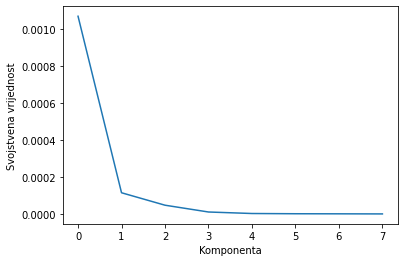

In [ ]:
#Vaš kod ide ovdje

import numpy as np

# izračunamo svojstvene vektore i svojstvene vrijednosti matrice kovarijance Σ
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sortiramo svojstvene vrijednosti i vektore po veličini svojstvenih vrijednosti
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# prikažemo svojstvene vrijednosti grafički
import matplotlib.pyplot as plt

plt.plot(eigenvalues)
plt.xlabel("Komponenta")
plt.ylabel("Svojstvena vrijednost")
plt.show()

2.2. Izračunajte koliki udio varijance objašnjavaju prve dvije komponente?

In [ ]:
#Vaš kod ide ovdje

# izračunamo ukupan udio varijance
total_variance = eigenvalues.sum()

# izračunamo udio varijance objašnjavanja prvih dviju komponenta
explained_variance = eigenvalues[:2].sum()

# izračunamo postotak varijance objašnjavanja prvih dviju komponenta
explained_variance_ratio = explained_variance / total_variance * 100

# ispišemo rezultat
print(f"Udio varijance objašnjavanja prvih dviju komponenta: {explained_variance_ratio:.2f}%")

Udio varijance objašnjavanja prvih dviju komponenta: 95.04%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  Ispišite (ili grafički prikažite) elemente prva dva svojstvena vektora. Pritom pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

S obzirom na to koje vrijednosnice opisuju prve dvije komponente, možete li zaključiti koju klasu imovine opisuje prva komponenta (koja odgovara prvom svojstvenom vektoru), a koju klasu druga komponenta? (*odgovor napišite u nastavku*)

In [ ]:
#Vaš kod ide ovdje

# ispišemo elemente prva dva svojstvena vektora
print("Elementi prvog svojstvenog vektora:")
print(eigenvectors[:, 0])
print("\nElementi drugog svojstvenog vektora:")
print(eigenvectors[:, 1])

Elementi prvog svojstvenog vektora:
[-0.46490446 -0.47791577 -0.60770765 -0.39004316 -0.06152524 -0.06105256
 -0.12858756 -0.09985274]

Elementi drugog svojstvenog vektora:
[-0.09545763 -0.09056391 -0.17876694  0.05059222  0.43132903  0.42718058
  0.60427256  0.46313662]


2.4. Ponovite prethodnu analizu za matricu korelacije povrata $C$. Koliki udio varijance u tom sučaju objašnjavaju prve dvije komponente? Usporedite elemente prva dva svojstvena vektora u ovom slučaju i u prethodnom slučaju - razlikuje li se interpretacija i kako? (*odgovor napišite u nastavku*)

In [ ]:
#Vaš kod ide ovdje

# izračunamo svojstvene vektore i svojstvene vrijednosti matrice korelacije C
eigenvalues_corr, eigenvectors_corr = np.linalg.eig(corr_matrix)

# sortiramo svojstvene vrijednosti i vektore po veličini svojstvenih vrijednosti
idx = eigenvalues_corr.argsort()[::-1]   
eigenvalues_corr = eigenvalues_corr[idx]
eigenvectors_corr = eigenvectors_corr[:,idx]

# izračunamo ukupan udio varijance
total_variance = eigenvalues_corr.sum()

# izračunamo udio varijance objašnjene prvih dvije komponente
explained_variance = eigenvalues_corr[:2].sum()

# izračunamo postotak varijance objašnjavanja prvih dviju komponenta
explained_variance_ratio = explained_variance / total_variance * 100

# ispišemo rezultat
print(f"Udio varijance objašnjene prvih dviju komponenta: {explained_variance_ratio:.2f}%")

#ispišemo elemente prva dva svojstvena vektora
print("Elementi prvog svojstvenog vektora:")
print(eigenvectors_corr[:, 0])
print("\nElementi drugog svojstvenog vektora:")
print(eigenvectors_corr[:, 1])

Udio varijance objašnjene prvih dviju komponenta: 95.86%
Elementi prvog svojstvenog vektora:
[-0.35281331 -0.35461631 -0.34278438 -0.33848134 -0.34113479 -0.34075976
 -0.37649873 -0.37875828]

Elementi drugog svojstvenog vektora:
[-0.37042585 -0.36817418 -0.37045455 -0.31404001  0.39805871  0.39787793
  0.29600639  0.2949532 ]


# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. 

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.



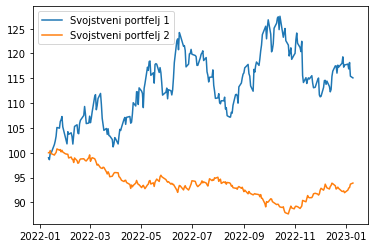

In [ ]:
#Vaš kod ide ovdje

# matrica povrata
returns = prices.pct_change().dropna()

# prva dva svojstvena vektora
w1 = eigenvectors[:, 0]
w2 = eigenvectors[:, 1]

# skaliramo svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti
w1 = w1 / abs(w1).sum()
w2 = w2 / abs(w2).sum()

# povrati portfelja
portfolio_returns_1 = returns.dot(w1)
portfolio_returns_2 = returns.dot(w2)

# "vraćamo" natrag u cijene, s tim da početna cijena bude jednaka za oba portfelja, tj. 100
portfolio_prices_1 = (1 + portfolio_returns_1).cumprod() * 100
portfolio_prices_2 = (1 + portfolio_returns_2).cumprod() * 100

# grafički prikažemo vremensko kretanje njihovih vrijednosti
import matplotlib.pyplot as plt

plt.plot(portfolio_prices_1, label="Svojstveni portfelj 1")
plt.plot(portfolio_prices_2, label="Svojstveni portfelj 2")
plt.legend()
plt.show()

# izračunamo anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja
portfolio_mean_1 = portfolio_returns_1.mean() * 252
portfolio_std_1 = portfolio_returns_1

Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 2 umjesto originalnih 8) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.